# Stochastic infectious pulse
https://github.com/alvason/stochastic-infectious-pulse

### Stochastic version for evolutionary insights

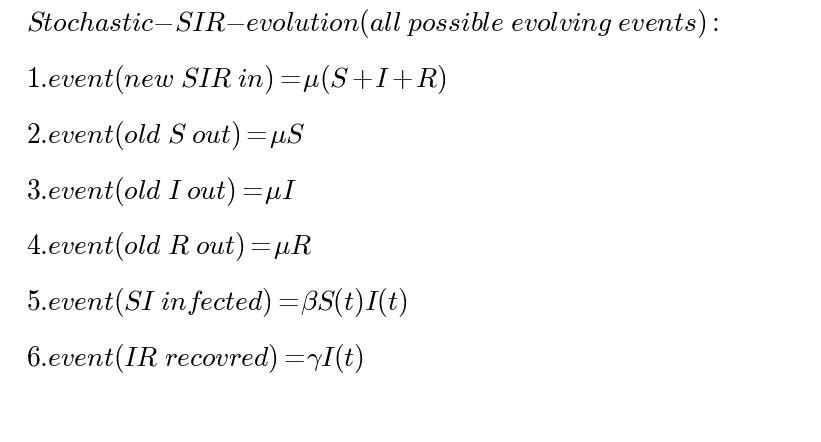

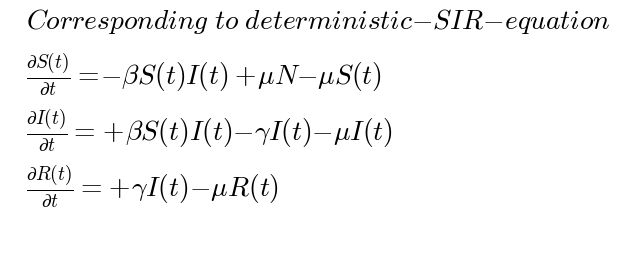

In [1]:
'''
author: Alvason Zhenhua Li
date:   07/07/2015
'''
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import time
import os
dir_path = '/Users/al/Desktop/GitHub/stochastic-infectious-pulse/figure'
file_name = 'stochastic-sir'

import alva_machinery_probability as alva

AlvaFontSize = 23
AlvaFigSize = (16, 8)
numberingFig = 0

# stochastic evolution
figure_name = '-stochastic-event'
file_suffix = '.png'
save_figure = os.path.join(dir_path, file_name + figure_name + file_suffix)
text_list = [r'$ Stochastic-SIR-evolution(all \ possible \ evolving \ events): $'
              , r'$ 1. event(new \ SIR \ in)  = \mu(S+I+R) $'
              , r'$ 2. event(old \ S \ out) = \mu S $'
              , r'$ 3. event(old \ I \ out) = \mu I $'
              , r'$ 4. event(old \ R \ out) = \mu R $'
              , r'$ 5. event(SI \ infected) = \beta S(t)I(t) $' 
              , r'$ 6. event(IR \ recovred) = \gamma I(t) $']
total_list = np.size(text_list)
numberingFig = numberingFig + 1
plt.figure(numberingFig, figsize=(total_list*2, total_list))
plt.axis('off')
for i in range(total_list):
    plt.text(0, (total_list - float(i))/total_list
             , text_list[i].replace('\\\n', '')
             , fontsize = 1.2*AlvaFontSize)
plt.savefig(save_figure, dpi = 100)
plt.show()

# relating to the deterministic SIR equation
text_list = [r'$ Corresponding \ to \ deterministic-SIR-equation $'
             , r'$ \frac{\partial S(t)}{\partial t} = \
                   -\beta S(t)I(t) +\mu N -\mu S(t) $'
             , r'$ \frac{\partial I(t)}{\partial t} = \
                   +\beta S(t)I(t) - \gamma I(t) -\mu I(t) $'
             , r'$ \frac{\partial R(t)}{\partial t} = \
                   +\gamma I(t) - \mu R(t) $']
total_list = np.size(text_list)
numberingFig = numberingFig + 1
plt.figure(numberingFig, figsize=(total_list*2, total_list))
plt.axis('off')
for i in range(total_list):
    plt.text(0, (total_list - float(i))/total_list
             , text_list[i].replace('\\\n', '')
             , fontsize = 1.2*AlvaFontSize)
plt.show()

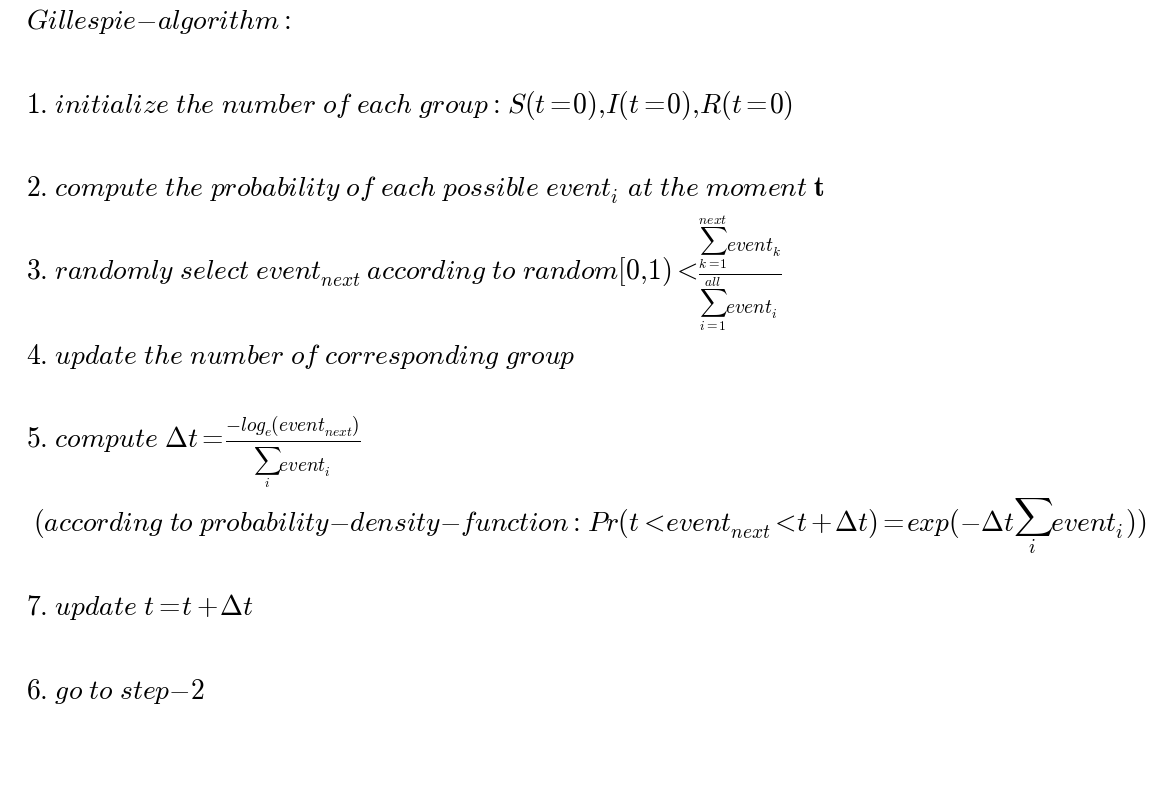

In [2]:
# algorithm for stochastic evolution
figure_name = '-Gillespie-algorithm'
file_suffix = '.png'
save_figure = os.path.join(dir_path, file_name + figure_name + file_suffix)
text_list = [r'$ Gillespie-algorithm: $'
             , r'$ 1. \ initialize \ the \ number \ of \ each \ group: \ S(t=0), I(t=0), R(t=0) $'
             , r'$ 2. \ compute \ the \ probability \ of \ each \ possible \ event_i \ at \ the \ moment \ \bf{t} $'
             , r'$ 3. \ randomly \ select \ event_{next} \
                   \ according \ to \ random{[0,1)} < \frac{\sum_{k=1}^{next}event_{k}}{\sum_{i=1}^{all} event_i} $'
             , r'$ 4. \ update \ the \ number \ of \ corresponding \ group $'
             , r'$ 5. \ compute \ \Delta t = \frac{-log_{e}(event_{next})}{\sum_{i}^{} event_i} $'
             , r'$ \ (according \ to \ probability-density-function: \ Pr(t < event_{next} < t+\Delta t) = \
                   exp(-\Delta t \sum_{i}^{} event_i )) $'
             , r'$ 7. \ update \ t = t + \Delta t $'
             , r'$ 6. \ go \ to \ step-2 $'
            ]
total_list = np.size(text_list)
numberingFig = numberingFig + 1
plt.figure(numberingFig, figsize=(total_list, total_list*1.5))
plt.axis('off')
for i in range(total_list):
    plt.text(0, (total_list - float(i))/total_list
             , text_list[i].replace('\\\n', '')
             , fontsize = 1.2*AlvaFontSize)
plt.savefig(save_figure, dpi = 100)
plt.show()

In [3]:
''' define stochasticSIR function '''
def stochasticSIR(total_step, minT, maxT, initial_S, initial_I, initial_R
                  , reprodNum, recovRate, inOutRate, infecRate):
    # intialized
    gT = np.zeros([total_step]) 
    gS = np.zeros([total_step]) 
    gI = np.zeros([total_step]) 
    gR = np.zeros([total_step]) 
    j = int(0)
    gT[j] = minT
    gS[j] = initial_S
    gI[j] = initial_I
    gR[j] = initial_R  
    # all possible events
    event_SIRin = inOutRate*(gS[j] + gI[j] + gR[j])
    event_Sout = inOutRate*gS[j]
    event_Iout = inOutRate*gI[j]
    event_Rout = inOutRate*gR[j]
    event_SI = infecRate*gS[j]*gI[j]/(gS[j] + gI[j] + gR[j])
    event_IR = recovRate*gI[j]
    # configuration table
    eventRate_updateSIR = np.array([[event_SIRin, +1, 0, 0]
                               , [event_Sout, -1, 0, 0]
                               , [event_Iout, 0, -1, 0]
                               , [event_Rout, 0, 0, -1]
                               , [event_SI, -1, +1, 0]
                               , [event_IR, 0, -1, +1]])
    ###
    while (gT[j] < maxT):       
        # randomly choose event
        if np.random.random() < (eventRate_updateSIR[0:0 + 1, 0].sum()/eventRate_updateSIR[:, 0].sum()):
            k = 0
        elif np.random.random() < (eventRate_updateSIR[0:1 + 1, 0].sum()/eventRate_updateSIR[:, 0].sum()):
            k = 1
        elif np.random.random() < (eventRate_updateSIR[0:2 + 1, 0].sum()/eventRate_updateSIR[:, 0].sum()):
            k = 2
        elif np.random.random() < (eventRate_updateSIR[0:3 + 1, 0].sum()/eventRate_updateSIR[:, 0].sum()):
            k = 3
        elif np.random.random() < (eventRate_updateSIR[0:4 + 1, 0].sum()/eventRate_updateSIR[:, 0].sum()):
            k = 4
        else:
            k = 5
        # update number of section
        gS[j] = gS[j] + eventRate_updateSIR[k, 1]
        gI[j] = gI[j] + eventRate_updateSIR[k, 2]
        gR[j] = gR[j] + eventRate_updateSIR[k, 3]
        # update event_rate
        event_SIRin = inOutRate*(gS[j] + gI[j] + gR[j])
        event_Sout = inOutRate*gS[j]
        event_Iout = inOutRate*gI[j]
        event_Rout = inOutRate*gR[j]
        event_SI = infecRate*gS[j]*gI[j]/(gS[j] + gI[j] + gR[j])
        event_IR = recovRate*gI[j]
        eventRate_updateSIR = np.array([[event_SIRin, 1, 0, 0]
                                      , [event_Sout, -1, 0, 0]
                                      , [event_Iout, 0, -1, 0]
                                      , [event_Rout, 0, 0, -1]
                                      , [event_SI, -1, +1, 0]
                                      , [event_IR, 0, -1, +1]])  
        # next step is based on current step
        dt = -np.log(np.random.random()) / eventRate_updateSIR[:, 0].sum()
        gT[j + 1] = gT[j] + dt 
        gS[j + 1] = gS[j]
        gI[j + 1] = gI[j]
        gR[j + 1] = gR[j]
        j = j + 1
    # set the value of remaining steps = value of the last step (for ending)
    gT[j:] = gT[j]
    gS[j:] = gS[j]
    gI[j:] = gI[j]
    gR[j:] = gR[j]
    ###
    return(gT, gS, gI, gR)

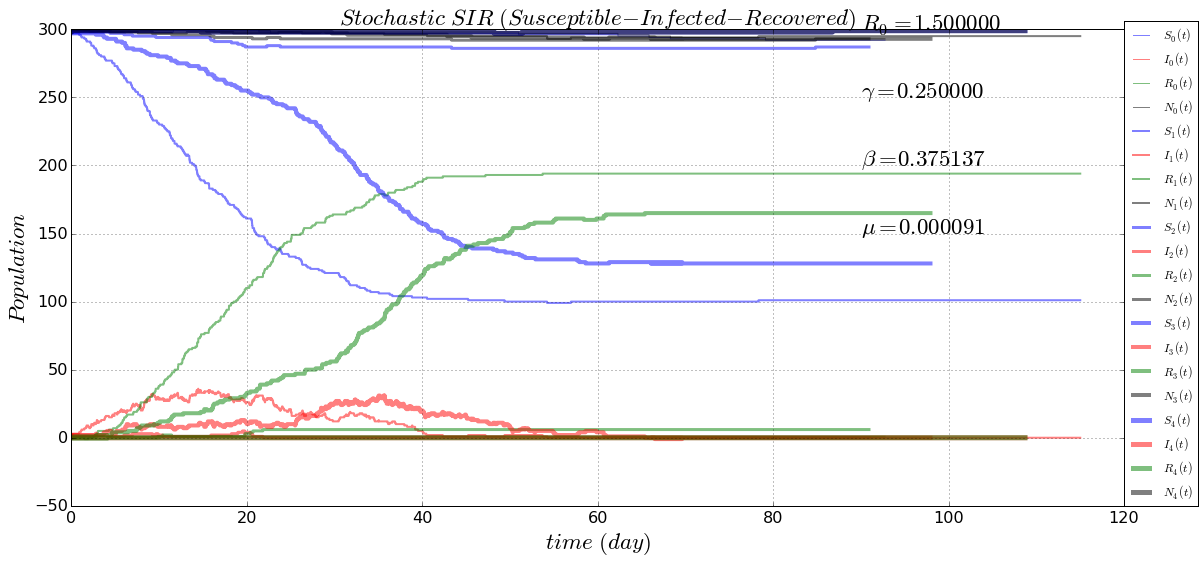

In [9]:
''' starting from one infected '''
# setting parameter
timeUnit = 'day'
if timeUnit == 'day':
    day = 1
    year = 365 
elif timeUnit == 'year':
    year = 1
    day = float(1)/365 
    
total_SIR = 300
initial_I = 1
initial_S = total_SIR - initial_I
initial_R = total_SIR - initial_S - initial_I
# set parameter
reprodNum = float(1.5) # basic reproductive number R0: one infected person will transmit to 1.8 person 
recovRate = float(1)/(4*day) # 4 days per period ==> rate/year = 365/4
inOutRate = float(1)/(30*year) # birth rate per year
infecRate = reprodNum*(recovRate + inOutRate)/1 # per year, per person, per total-population

# initial boundary condition
minT = float(0*day)
maxT = float(90*day)

total_step = int(maxT*total_SIR)
# stochastic evolution way
total_way = int(5)
gTT = np.zeros([total_way, total_step]) 
gSS = np.zeros([total_way, total_step]) 
gII = np.zeros([total_way, total_step]) 
gRR = np.zeros([total_way, total_step]) 

for i in range(total_way):
    aaa = stochasticSIR(total_step, minT, maxT, initial_S, initial_I, initial_R
                        , reprodNum, recovRate, inOutRate, infecRate)
    gTT[i] = aaa[0]
    gSS[i] = aaa[1]
    gII[i] = aaa[2]
    gRR[i] = aaa[3]

# plotting
figure_name = '-sir'
file_suffix = '.png'
save_figure = os.path.join(dir_path, file_name + figure_name + file_suffix)

numberingFig = numberingFig + 1
figure = plt.figure(numberingFig, figsize = AlvaFigSize)
for i in range(total_way):
    plt.plot(gTT[i], gSS[i], drawstyle = 'steps', label = r'$ S_{:}(t) $'.format(i), linewidth = (1 + i)
             , color = 'blue', alpha = float(0.5 + i/total_way))
    plt.plot(gTT[i], gII[i], drawstyle = 'steps', label = r'$ I_{:}(t) $'.format(i), linewidth = (1 + i)
             , color = 'red', alpha = float(0.5 + i/total_way))
    plt.plot(gTT[i], gRR[i], drawstyle = 'steps', label = r'$ R_{:}(t) $'.format(i), linewidth = (1 + i)
             , color = 'green', alpha = float(0.5 + i/total_way))
    plt.plot(gTT[i], (gSS[i] + gII[i] + gRR[i]), drawstyle = 'steps', label = r'$ N_{:}(t) $'.format(i)
             , linewidth = (1 + i), color = 'black', alpha = float(0.5 + i/total_way))    
plt.grid(True)
plt.title(r'$ Stochastic \ SIR \ (Susceptible-Infected-Recovered) $', fontsize = AlvaFontSize)
plt.xlabel(r'$ time \ ({:})$'.format(timeUnit), fontsize = AlvaFontSize)
plt.ylabel(r'$ Population $', fontsize = AlvaFontSize)
plt.legend(loc = (1,0))
plt.text(maxT, total_SIR*6.0/6, r'$ R_0 = %f $'%(reprodNum), fontsize = AlvaFontSize)
plt.text(maxT, total_SIR*5.0/6, r'$ \gamma = %f $'%(recovRate), fontsize = AlvaFontSize)
plt.text(maxT, total_SIR*4.0/6, r'$ \beta = %f $'%(infecRate), fontsize = AlvaFontSize)
plt.text(maxT, total_SIR*3.0/6, r'$ \mu = %f $'%(inOutRate), fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.7)
plt.yticks(fontsize = AlvaFontSize*0.7) 
figure.tight_layout()
plt.savefig(save_figure, dpi = 100, bbox_inches='tight')
plt.show()

In [5]:
if np.random.random() < 1.0/4:
    print 'k = 1'
elif np.random.random() < 2.0/4:
    print 'k = 2'
elif np.random.random() < 3.0/4:
    print 'k = 3'
else:
    print 'k = 4'
print 'end'

k = 2
end


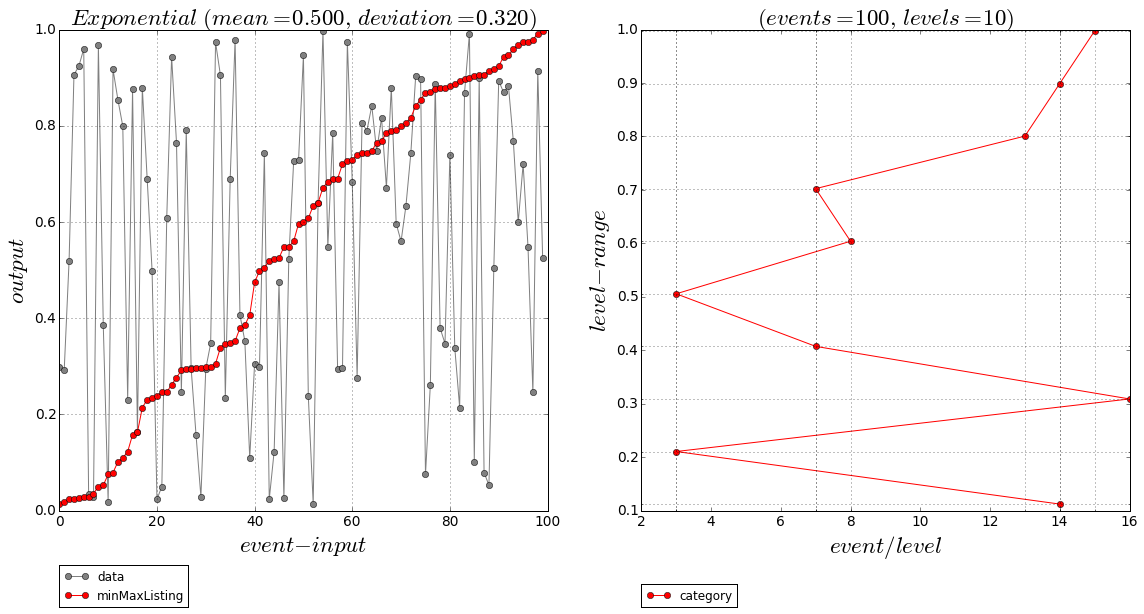

In [6]:
'''uniform randomness --- uniform distribution'''
total_event = int(100)
gInput = np.arange(total_event)
meanP = 0.5
randomSeed = np.random.uniform(0, 1, total_event)

sumP = 0
for i in range(total_event):
    sumP = sumP + (meanP - randomSeed[i])**2
deviationP = (sumP/total_event)**(1.0/2)

totalLevel = int(total_event/10)
category = alva.AlvaLevel(randomSeed, totalLevel, False)
gLevel = category[0]
gLevel_int = gLevel.astype(int)
numberLevel = category[1]
#print ('level =', gLevel)
#print ('level_int =', gLevel_int)

# plotting
figure_name = ''
file_suffix = '.png'
save_figure = os.path.join(dir_path, file_name + figure_name + file_suffix)

numberingFig = numberingFig + 1
figure = plt.figure(numberingFig, figsize = AlvaFigSize)
plot1 = figure.add_subplot(1, 2, 1)
plot1.plot(gInput, randomSeed, color = 'gray', marker = 'o', label = 'data')
plot1.plot(gInput, alva.AlvaMinMax(randomSeed), color = 'red', marker = 'o', label = 'minMaxListing')
if total_event < 100:
    plot1.set_xticks(gInput, minor = True) 
    plot1.set_yticks(randomSeed, minor = True)
    plot1.grid(True, which = 'minor')
else:
    plot1.grid(True, which = 'major')
plt.title(r'$ Exponential \ (mean = {:1.3f},\ deviation = {:1.3f}) $'.format(meanP, deviationP), fontsize = AlvaFontSize)
plt.xlabel(r'$ event-input $', fontsize = AlvaFontSize)
plt.ylabel(r'$ output $', fontsize = AlvaFontSize)
plt.legend(loc = (0, -0.2))
plt.xticks(fontsize = AlvaFontSize*0.6)
plt.yticks(fontsize = AlvaFontSize*0.6) 

plot2 = figure.add_subplot(1, 2, 2)
plot2.plot(numberLevel, gLevel, color = 'red', marker = 'o', label = 'category')
if totalLevel < 100:
    plot2.set_xticks(numberLevel, minor = True) 
    plot2.set_yticks(gLevel, minor = True)
    plot2.grid(True, which = 'minor')
else:
    plot2.grid(True, which = 'major')
plt.title(r'$ (events = {:},\ levels = {:}) $'.format(total_event, totalLevel)
          , fontsize = AlvaFontSize)
plt.xlabel(r'$ event/level $', fontsize = AlvaFontSize)
plt.ylabel(r'$ level-range $', fontsize = AlvaFontSize)
plt.legend(loc = (0, -0.2))
plt.xticks(fontsize = AlvaFontSize*0.6)
plt.yticks(fontsize = AlvaFontSize*0.6) 

figure.tight_layout()
plt.savefig(save_figure, dpi = 100)
plt.show()

[ 0.88646253  0.65249923  0.21169421  0.62797722  0.89766146  0.81439854
  0.9482004   0.60056093  0.59342542  0.25724829]


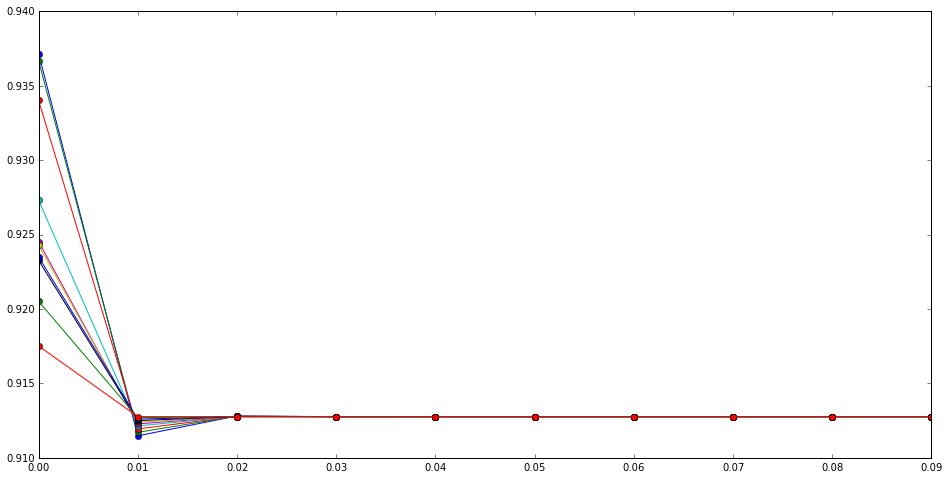

In [7]:
randomSeed = np.random.uniform(0, 1, 100)

event_all_rate = randomSeed[0:10]
print event_all_rate
event_all_PD = event_all_rate/event_all_rate.sum()

dt = 0.01
total_step = 10

gT = np.arange(total_step)*dt
event_n = np.zeros([total_step, event_all_rate.size])
event_n[0] = event_all_PD

for i in range(total_step):
    for j in range(event_all_rate.size):
        event_n[i, j] = np.exp(-dt * np.sum(event_all_rate))
        event_all_rate[j] = event_n[i, j] 
#    event_all_PD = event_all_PD/event_all_PD.sum()

numberingFig = numberingFig + 1
figure = plt.figure(numberingFig, figsize = AlvaFigSize)
for j in range(event_all_rate.size):
    plt.plot(gT, event_n[:, j], marker = 'o')
plt.show()